In this dataset,I carry out basic exploratory data analysis,feature engineering,feature selection and model implementation.
Attribute Information:

1) ID number<br>
2) Diagnosis (M = malignant, B = benign)<br>
Ten real-valued features are computed for each cell nucleus:<br>

a) radius (mean of distances from center to points on the perimeter)<br>
b) texture (standard deviation of gray-scale values)<br>
c) perimeter<br>
d) area<br>
e) smoothness (local variation in radius lengths)<br>
f) compactness (perimeter^2 / area - 1.0)<br>
g) concavity (severity of concave portions of the contour)<br>
h) concave points (number of concave portions of the contour)<br>
i) symmetry<br>
j) fractal dimension ("coastline approximation" - 1)<br>

The mean, standard error and "worst" or largest (mean of the three<br>
largest values) of these features were computed for each image,<br>
resulting in 30 features. For instance, field 3 is Mean Radius, field<br>
13 is Radius SE, field 23 is Worst Radius.<br>

All feature values are recoded with four significant digits.<br>

Missing attribute values: none<br>

Class distribution: 357 benign, 212 malignant<br>

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [230]:
df=pd.read_csv('bc_analysis.csv')

In [231]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [135]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [136]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [137]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [138]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [139]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


EXPLORATORY DATA ANALYSIS

/Users/mohammednumanrizwan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

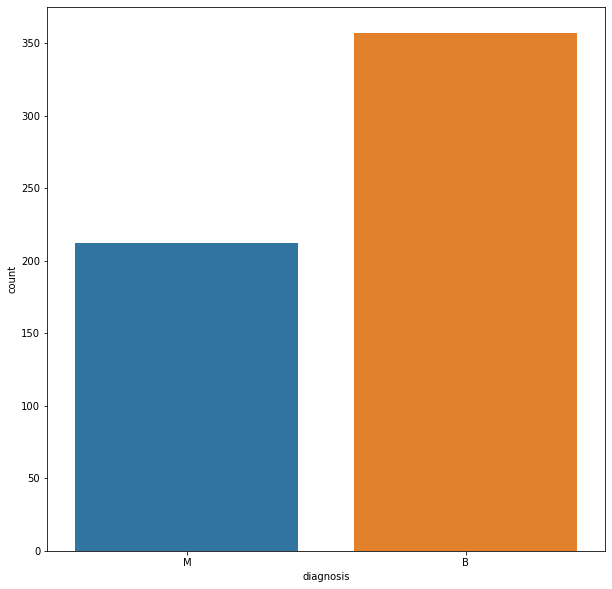

In [140]:
plt.figure(figsize=(10,10))
sns.countplot(df['diagnosis'])

The counts above clearly shows that it is not an imbalanced dataset

Dividing the columns into 3 categories for visualization purpose 

In [141]:
independent_cols=list(df.columns)[1:]
mean_col=['diagnosis']
se_col=['diagnosis']
worst_col=['diagnosis']
for i in independent_cols:
    if '_mean' in i:
        mean_col.append(i)
    if '_se' in i:
        se_col.append(i)
    if '_worst' in i:
        worst_col.append(i)      


In [142]:
mean_features=df[mean_col]
X=mean_features.iloc[:,1:]
y=mean_features.iloc[:,0]
new_data = (X - X.mean()) /(X.std())             
data = pd.concat([y,new_data],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

<AxesSubplot:xlabel='features', ylabel='value'>

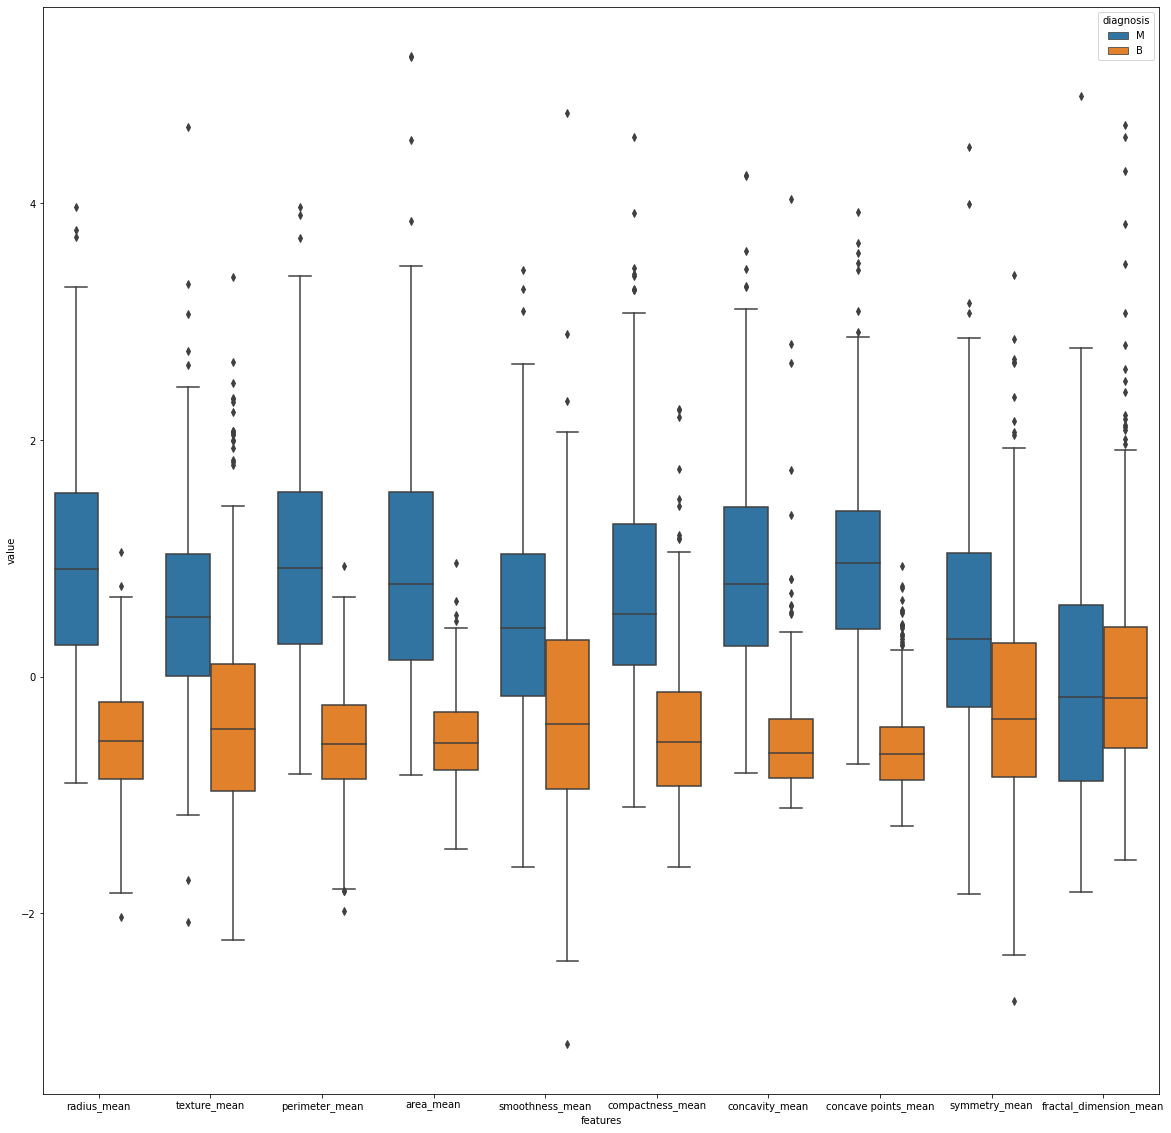

In [143]:
plt.figure(figsize=(20,20))
sns.boxplot(x='features',y='value',hue='diagnosis',data=data)

<AxesSubplot:xlabel='features', ylabel='value'>

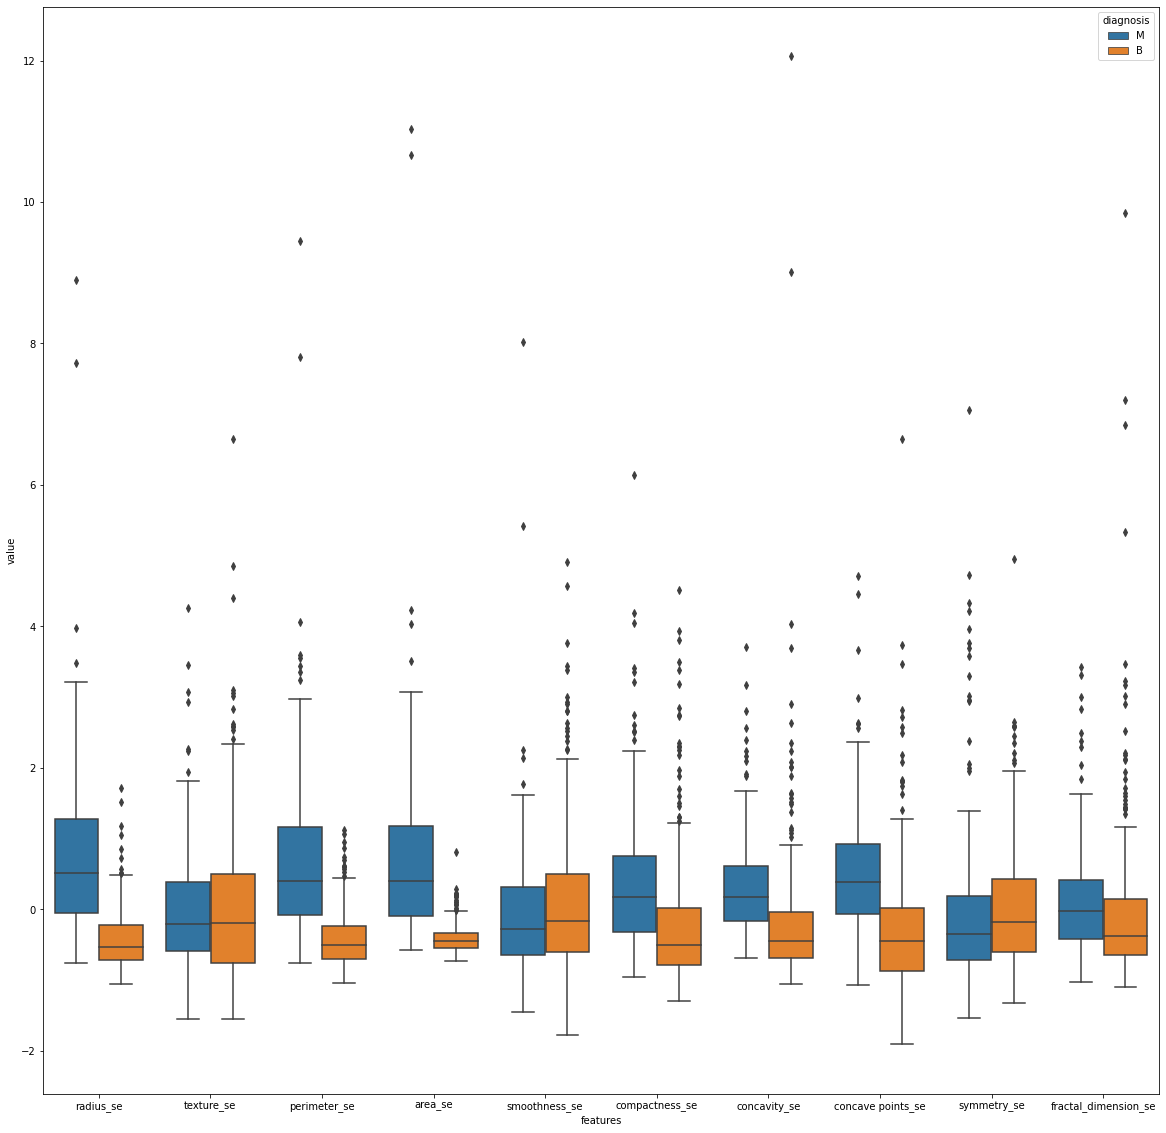

In [144]:
se_features=df[se_col]
X=se_features.iloc[:,1:]
y=se_features.iloc[:,0]
new_data = (X - X.mean()) /(X.std())             
data = pd.concat([y,new_data],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,20))
sns.boxplot(x='features',y='value',hue='diagnosis',data=data)

<AxesSubplot:xlabel='features', ylabel='value'>

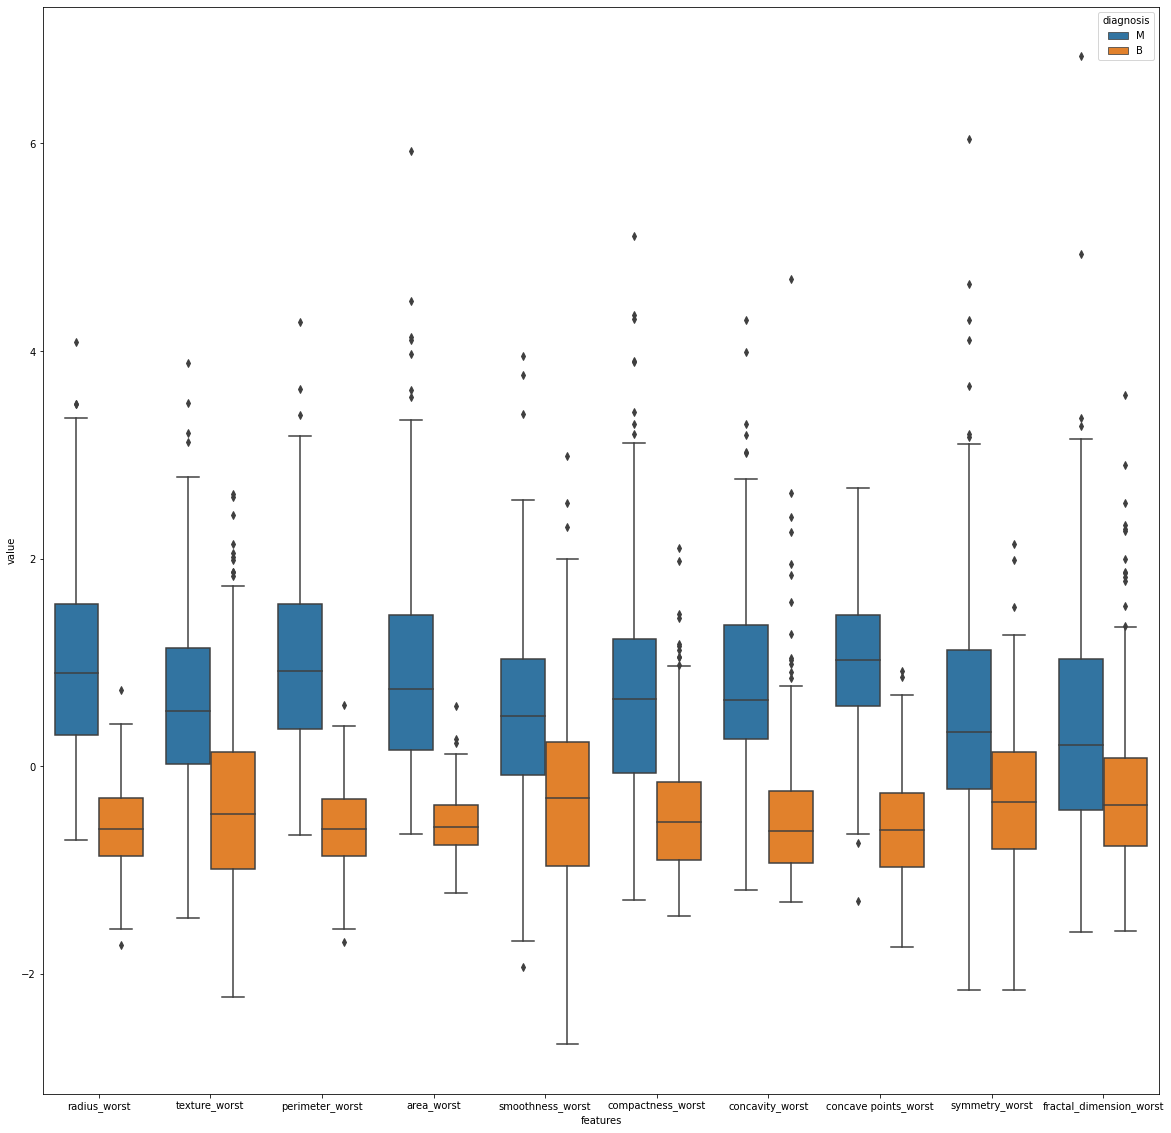

In [145]:
worst_features=df[worst_col]
X=worst_features.iloc[:,1:]
y=worst_features.iloc[:,0]
new_data = (X - X.mean()) /(X.std())             
data = pd.concat([y,new_data],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,20))
sns.boxplot(x='features',y='value',hue='diagnosis',data=data)

The boxplots above give us a hollistic view of the data. Swarmplots or violin plots can also be used.

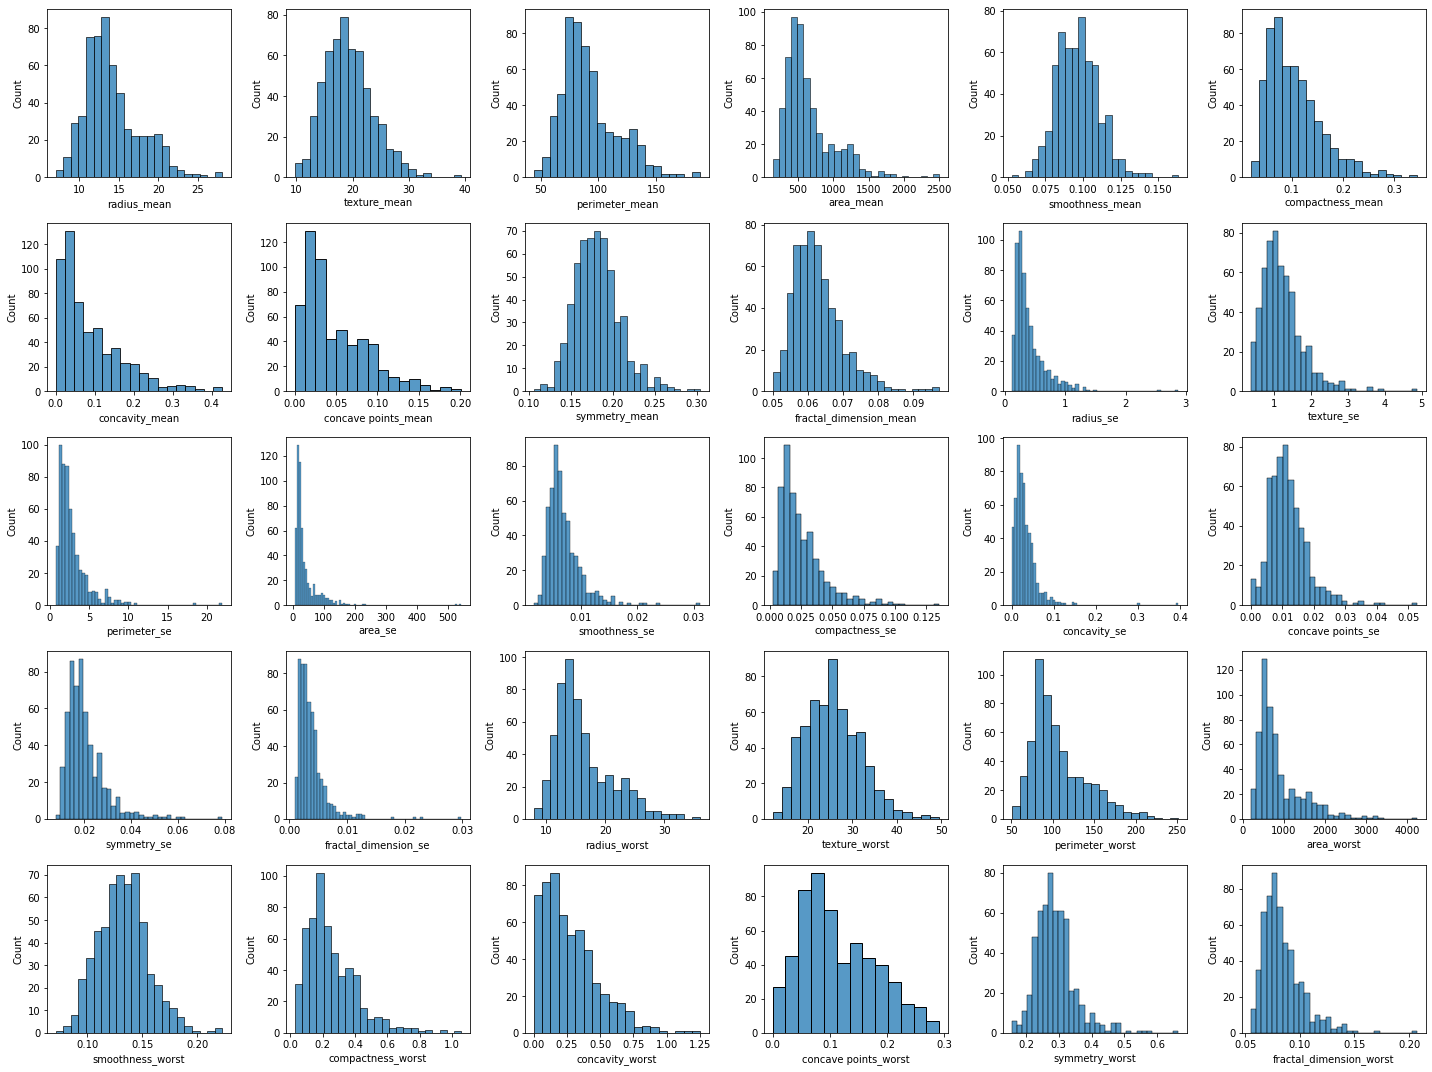

In [146]:
plot_value=1
plt.figure(figsize=(20,15))
for i in independent_cols:
    if plot_value<=30:
        plt.subplot(5,6,plot_value)
        sns.histplot(df[i])
        plot_value=plot_value+1
plt.tight_layout()

Getting an idea about the distribution of the data and the number of outliers

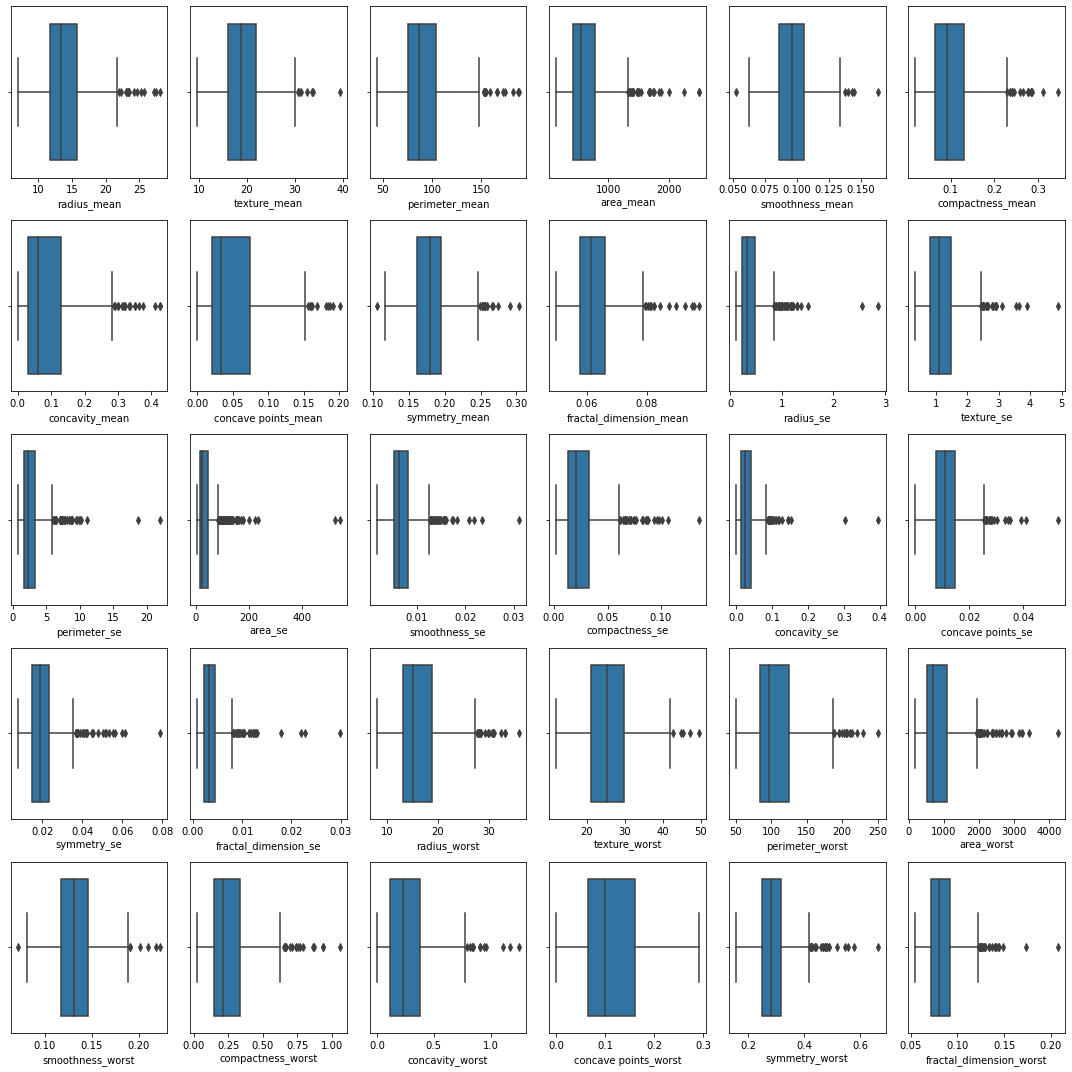

In [147]:
plot_value=1
plt.figure(figsize=(15,15))
for i in independent_cols:
    if plot_value<=30:
        plt.subplot(5,6,plot_value)
        sns.boxplot(x=df[i])
        plot_value=plot_value+1
plt.tight_layout()

Correlation heatmap is mandatory to understand relationship among different independent features

<AxesSubplot:>

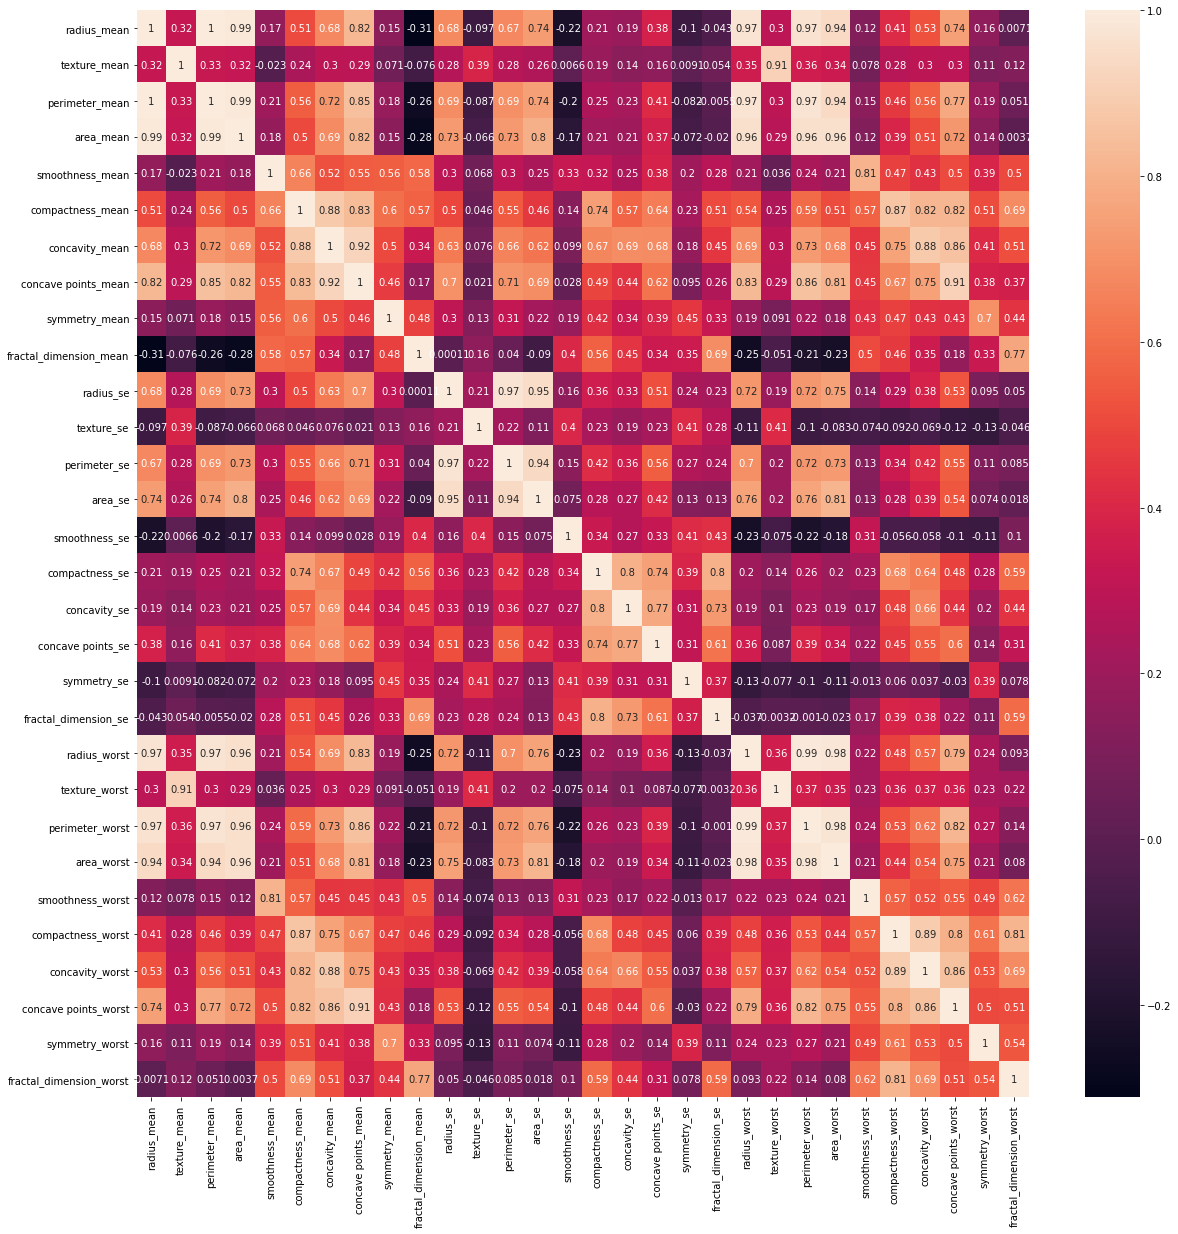

In [148]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

FEATURE ENGINEERING

In feature engineering we are handling outliers in the data and scaling the data

In [149]:
df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})
data=df.copy()

In [150]:
#Handling Outlier Values
#From the boxplot or the histplot we can interpret the features which are right_skewed,left_skewed or normal distribution
normal_distributed=['texture_mean','smoothness_mean','symmetry_mean','concave points_se','symmetry_se','fractal_dimension_se','texture_worst','smoothness_worst','symmetry_worst']
right_skew_distributed=[]
for i in independent_cols:
    if i not in normal_distributed:
        right_skew_distributed.append(i)


In [151]:
#For normal distributed features
for i in  normal_distributed:
    uppper_boundary=data[i].mean() + (3* data[i].std())
    lower_boundary=data[i].mean() - (3* data[i].std())
    data.loc[data[i]>uppper_boundary,i]=uppper_boundary
    data.loc[data[i]<lower_boundary,i]=lower_boundary
    

In [152]:
#For right skewed distribution
for i in right_skew_distributed:
    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)
    lower_boundary=df[i].quantile(0.25)-(IQR*1.5)
    upper_boundary=df[i].quantile(0.75)+(IQR*1.5)
    data.loc[data[i]>upper_boundary,i]=upper_boundary
    data.loc[data[i]<lower_boundary,i]=lower_boundary


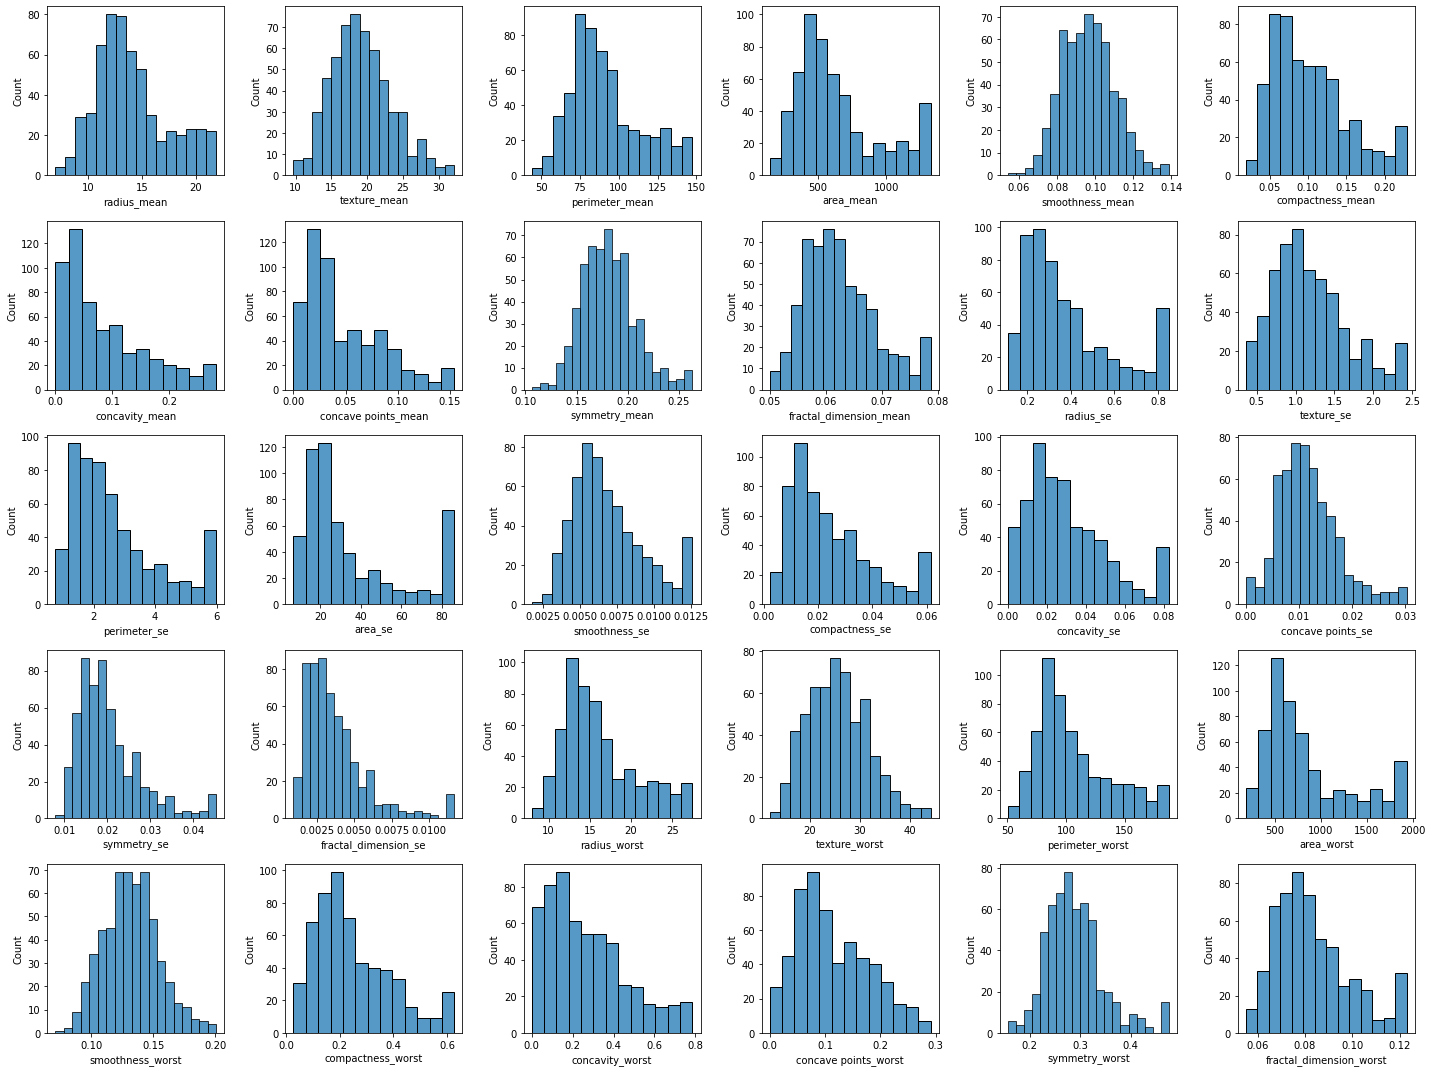

In [153]:
plot_value=1
plt.figure(figsize=(20,15))
for i in independent_cols:
    if plot_value<=30:
        plt.subplot(5,6,plot_value)
        sns.histplot(data[i])
        plot_value=plot_value+1
plt.tight_layout()

As we can see in the distribution above outliers have been eliminated

In [154]:
#Scaling the data before feature selection
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data.iloc[:,1:])

In [155]:
data.columns[1:]

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [156]:
data_scaled=pd.DataFrame(data_scaled,columns=data.columns[1:])

In [157]:
data_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.176800,-2.101559,1.357375,1.184085,1.600538,2.541404,2.647422,2.620973,2.267376,2.511708,...,2.006477,-1.370047,2.439568,2.287627,1.328254,2.641905,2.246192,2.296076,2.938041,2.225247
1,1.949929,-0.354881,1.795991,2.249396,-0.837136,-0.498189,-0.000497,0.574944,0.006995,-0.925449,...,1.921384,-0.369910,1.631542,2.287627,-0.376678,-0.443388,-0.137634,1.087084,-0.243751,0.355314
2,1.686226,0.467642,1.670052,1.846217,0.963238,1.148680,1.496076,2.110330,0.964026,-0.407692,...,1.611558,-0.021178,1.434234,1.807751,0.537947,1.223448,0.920718,1.955000,1.239710,0.265197
3,-0.791983,0.262011,-0.606410,-0.831485,3.060005,2.541404,2.091997,1.506601,2.930223,2.517947,...,-0.277945,0.138384,-0.245395,-0.593838,3.044992,2.641905,2.119474,2.175786,3.205820,2.482456
4,1.866023,-1.165585,1.891531,2.154338,0.289727,0.599453,1.504202,1.482665,-0.004177,-0.588595,...,1.386825,-1.478614,1.424838,1.525780,0.227152,-0.314469,0.665254,0.729259,-0.907269,-0.410683


In [158]:
diagnosis_feature=data.iloc[:,0]
new_data=pd.concat([diagnosis_feature,data_scaled],axis=1)

In [159]:
new_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.176800,-2.101559,1.357375,1.184085,1.600538,2.541404,2.647422,2.620973,2.267376,...,2.006477,-1.370047,2.439568,2.287627,1.328254,2.641905,2.246192,2.296076,2.938041,2.225247
1,1,1.949929,-0.354881,1.795991,2.249396,-0.837136,-0.498189,-0.000497,0.574944,0.006995,...,1.921384,-0.369910,1.631542,2.287627,-0.376678,-0.443388,-0.137634,1.087084,-0.243751,0.355314
2,1,1.686226,0.467642,1.670052,1.846217,0.963238,1.148680,1.496076,2.110330,0.964026,...,1.611558,-0.021178,1.434234,1.807751,0.537947,1.223448,0.920718,1.955000,1.239710,0.265197
3,1,-0.791983,0.262011,-0.606410,-0.831485,3.060005,2.541404,2.091997,1.506601,2.930223,...,-0.277945,0.138384,-0.245395,-0.593838,3.044992,2.641905,2.119474,2.175786,3.205820,2.482456
4,1,1.866023,-1.165585,1.891531,2.154338,0.289727,0.599453,1.504202,1.482665,-0.004177,...,1.386825,-1.478614,1.424838,1.525780,0.227152,-0.314469,0.665254,0.729259,-0.907269,-0.410683


FEATURE SELECTION

Just eliminated the highly correlated features and used remaining features for model building.SelectKbest and other methods can also be sued for feature selection

In [160]:
#In order carry out feature selection we will be using the train dataset as we dont want feature selection to be influenced by test data and cause an overfitting model
from sklearn.model_selection import train_test_split
X=new_data.iloc[:,1:]
y=new_data.iloc[:,0]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [161]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr
highly_correlated_features=correlation(X_train,0.9)

In [229]:
highly_correlated_features

{'area_mean',
 'area_se',
 'area_worst',
 'concave points_mean',
 'concave points_worst',
 'concavity_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'texture_worst'}

In [162]:
X_train.drop(highly_correlated_features,axis=1,inplace=True)
X_test.drop(highly_correlated_features,axis=1,inplace=True)

MODEL EVALUATION

Used a few classification models like Logistic Regression,Random Forest Classification,KNN Classification and Gradient Boosting.Scope for doing hyperparameter tuning and using cross validation

In [184]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
log_reg_model=LogisticRegression()
log_reg_model.fit(X_train,y_train)

LogisticRegression()

In [185]:
pred_results=log_reg_model.predict(X_test)

In [186]:
print(accuracy_score(y_test,pred_results))

0.9649122807017544


In [187]:
log_reg=accuracy_score(y_test,pred_results)


In [188]:
# KNN CLASSIFICATION
from sklearn.neighbors import KNeighborsClassifier

In [189]:
# Finding optimum K value using elbow method
error_rate=[]
for i in range(1,51):
    knn_model=KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train,y_train)
    y_pred=knn_model.predict(X_test)
    error_rate.append(np.mean(y_pred!=y_test))
    
    

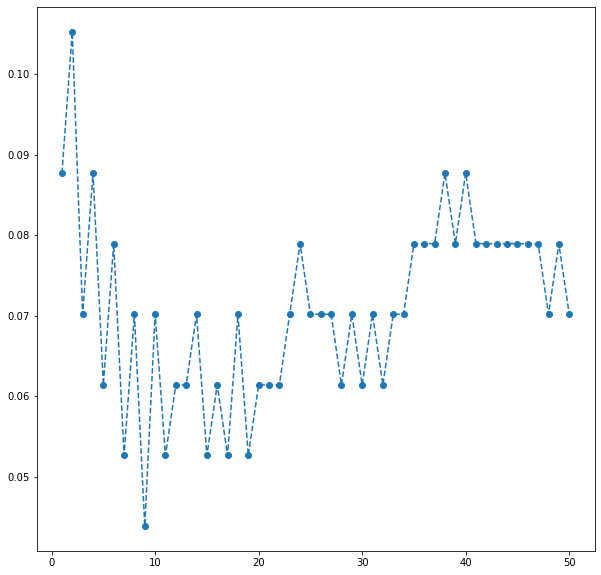

In [190]:
figure=plt.figure(figsize=(10,10))
plt.plot(range(1,51),error_rate,linestyle='dashed',marker='o')

In [191]:
knn_model=KNeighborsClassifier(n_neighbors=37)
knn_model.fit(X_train,y_train)
pred_results=knn_model.predict(X_test)
accuracy_score(y_test,pred_results)

0.9210526315789473

In [192]:
knn_mod=accuracy_score(y_test,pred_results)

In [193]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
classifier_model=RandomForestClassifier()
classifier_model.fit(X_train,y_train)
pred_results=classifier_model.predict(X_test)
accuracy_score(y_test,pred_results)


0.9298245614035088

In [194]:
rfc=accuracy_score(y_test,pred_results)

In [195]:
from sklearn.ensemble import GradientBoostingClassifier

In [196]:
gb_model=GradientBoostingClassifier()

In [197]:
gb_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [198]:
pred_results=gb_model.predict(X_test)

In [199]:
accuracy_score(y_test,pred_results)

0.9649122807017544

In [200]:
gb_tech=accuracy_score(y_test,pred_results)

In [216]:
dic={'Techniques':['Gradient Boosting','K nearest Neighbors','Random Forest Classification','Logistic Regression'],'Accuracy':[gb_tech,knn_mod,rfc,log_reg]}

In [217]:
accuracy_table=pd.DataFrame(dic)

<AxesSubplot:xlabel='Accuracy', ylabel='Techniques'>

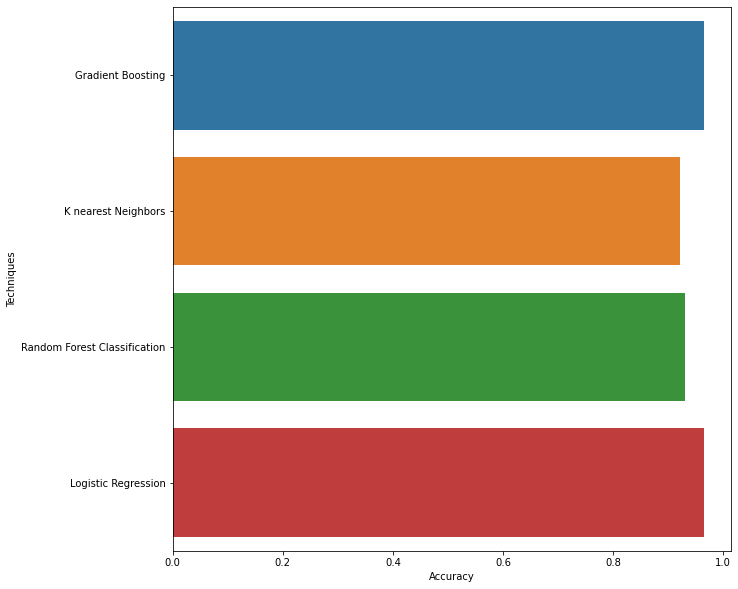

In [225]:
plt.figure(figsize=(10,10))
sns.barplot(x='Accuracy',y='Techniques',data=accuracy_table)